In [2]:
import os
import numpy as np
import pickle

In [3]:
cwd = os.getcwd()
parent_wd = cwd.replace('/preprocessing', '')
processed_xy_path = parent_wd + '/preprocessing/processed_data_xy_mode'

In [4]:
with open(processed_xy_path, 'rb') as f:
    output_xy_mode_read = pickle.load(f)

## assign train/dev/test set

In [5]:
n_benchmark_withgrade = len(output_xy_mode_read['X_dict_benchmark_withgrade'])
n_benchmark_nograde = len(output_xy_mode_read['X_dict_benchmark_nograde'])
n_withgrade = len(output_xy_mode_read['X_dict_withgrade'])
n_nograde = len(output_xy_mode_read['X_dict_nograde'])
print('Number of benchmarked samples with user grade = %s' %n_benchmark_withgrade)
print('Number of benchmarked samples without user grade = %s' %n_benchmark_nograde)
print('Number of non-benchmarked samples with user grade = %s' %n_withgrade)
print('Number of non-benchmarked samples without user grade = %s' %n_nograde)

Number of benchmarked samples with user grade = 358
Number of benchmarked samples without user grade = 9
Number of non-benchmarked samples with user grade = 8607
Number of non-benchmarked samples without user grade = 21660


In [6]:
X_dict_usergrade_merge = {**output_xy_mode_read['X_dict_benchmark_withgrade'] , **output_xy_mode_read['X_dict_withgrade']}
Y_dict_usergrade_merge = {**output_xy_mode_read['Y_dict_benchmark_withgrade'] , **output_xy_mode_read['Y_dict_withgrade']}

In [19]:
X_dict_nograde_merge = {**output_xy_mode_read['X_dict_benchmark_nograde'] , **output_xy_mode_read['X_dict_nograde']}
Y_dict_nograde_merge = {**output_xy_mode_read['Y_dict_benchmark_nograde'] , **output_xy_mode_read['Y_dict_nograde']}

In [7]:
n_sample = len(Y_dict_usergrade_merge)
X_usergrade_merge = np.zeros((n_sample, 20, 10))
Y_difficulties_usergrade_merge = np.zeros(n_sample)
Y_isbenchmark_usergrade_merge = np.zeros(n_sample)
Y_usergrade_usergrade_merge = np.zeros(n_sample)
keys_usergrade_merge = []
tmax_usergrade_merge = np.zeros(n_sample)
i = 0
for key, value in X_dict_usergrade_merge.items():
    X_data = value.T
    X_usergrade_merge[i, 0:X_data.shape[0], :] = X_data
    Y_difficulties_usergrade_merge[i] = Y_dict_usergrade_merge[key][0]
    Y_isbenchmark_usergrade_merge[i] = Y_dict_usergrade_merge[key][1]
    Y_usergrade_usergrade_merge[i] = Y_dict_usergrade_merge[key][2]
    keys_usergrade_merge.append(key)
    tmax_usergrade_merge[i] = X_data.shape[0]
    i = i + 1

In [22]:
n_sample = len(Y_dict_nograde_merge)
X_nograde_merge = np.zeros((n_sample, 30, 10))
Y_difficulties_nograde_merge = np.zeros(n_sample)
Y_isbenchmark_nograde_merge = np.zeros(n_sample)
keys_nograde_merge = []
tmax_nograde_merge = np.zeros(n_sample)
i = 0
for key, value in X_dict_nograde_merge.items():
    X_data = value.T
    X_nograde_merge[i, 0:X_data.shape[0], :] = X_data
    Y_difficulties_nograde_merge[i] = Y_dict_nograde_merge[key][0]
    Y_isbenchmark_nograde_merge[i] = Y_dict_nograde_merge[key][1]
    keys_nograde_merge.append(key)
    tmax_nograde_merge[i] = X_data.shape[0]
    i = i + 1

(array([0.000e+00, 0.000e+00, 5.000e+00, 5.867e+03, 2.449e+03, 3.638e+03,
        3.113e+03, 2.579e+03, 1.157e+03, 1.368e+03, 8.940e+02, 3.310e+02,
        1.650e+02, 5.100e+01, 5.200e+01]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

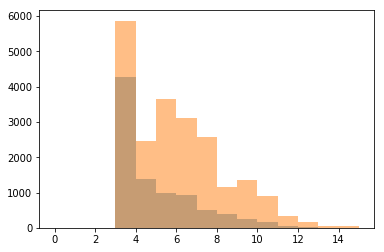

In [24]:
plt.hist(Y_difficulties_usergrade_merge, bins = range(16), alpha = 0.5)
plt.hist(Y_difficulties_nograde_merge, bins = range(16), alpha = 0.5)

In [25]:
max(Y_difficulties_nograde_merge)

15.0